In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('./data/train.csv')
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


In [108]:
df.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765,36765
unique,36765,4191,36691,7,3
top,eb27fb55fc6c,900A879708F0,Summer projects should be student-designed,Evidence,Adequate
freq,1,23,14,12105,20977


In [109]:
df[df['discourse_text'].duplicated(keep=False)]

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
296,4c2ee7d56e14,072BF1F05F66,The use of the Facial Action Coding System to ...,Position,Effective
370,f8191ae1bf28,0839B4ACC2AF,Summer projects should be teacher-designed,Position,Adequate
1009,edf3ee8c1cee,130F9B6DCCF9,Summer projects should be teacher-designed,Position,Adequate
1552,cb2b1c856eee,1D7E734B4A3D,Summer projects should be teacher-designed,Position,Adequate
1667,1ff07a54bbf5,1F06A4B670A1,Summer projects should be student-designed,Position,Adequate
...,...,...,...,...,...
35488,bcdb6e47ede3,AB8EFBD82820,you can help others.,Claim,Ineffective
35493,98510222f9b8,AB8EFBD82820,you can help others.,Claim,Adequate
35969,d9c17f7d8b7a,C8FB2508978A,"opinions,",Claim,Adequate
35973,9b72380e4fc2,C8FB2508978A,"opinions,",Claim,Ineffective


In [106]:
df.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,119,119,119,119,119
unique,119,108,45,6,3
top,608e1d81f4ed,AB8EFBD82820,Summer projects should be student-designed,Position,Adequate
freq,1,2,14,67,99


<BarContainer object of 3 artists>

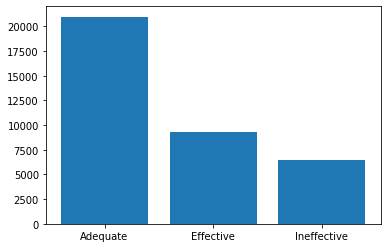

In [25]:
plt.bar(df.discourse_effectiveness.value_counts().keys(), df.discourse_effectiveness.value_counts().values)

<BarContainer object of 7 artists>

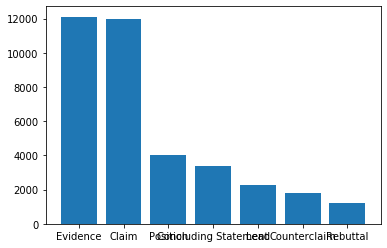

In [28]:
plt.bar(df.discourse_type.value_counts().keys(), df.discourse_type.value_counts().values)

In [94]:
gk = df.groupby(['discourse_type', 'discourse_effectiveness'])['discourse_effectiveness'].count()
gk

#TO DO: plot

discourse_type        discourse_effectiveness
Claim                 Adequate                   7097
                      Effective                  3405
                      Ineffective                1475
Concluding Statement  Adequate                   1945
                      Effective                   825
                      Ineffective                 581
Counterclaim          Adequate                   1150
                      Effective                   418
                      Ineffective                 205
Evidence              Adequate                   6064
                      Effective                  2885
                      Ineffective                3156
Lead                  Adequate                   1244
                      Effective                   683
                      Ineffective                 364
Position              Adequate                   2784
                      Effective                   770
                      Ineffective   

In [111]:
temp = df.groupby(["essay_id"]).discourse_type.value_counts().to_frame()
temp.columns = ['amount']
temp.reset_index(drop = False, inplace=True)
temp = temp.pivot(index="essay_id", columns = "discourse_type").amount
temp

discourse_type,Claim,Concluding Statement,Counterclaim,Evidence,Lead,Position,Rebuttal
essay_id,,,,,,,
00066EA9880D,3.0,1.0,NaN,3.0,1.0,1.0,NaN
000E6DE9E817,5.0,1.0,1.0,3.0,NaN,1.0,1.0
0016926B079C,7.0,NaN,NaN,3.0,NaN,1.0,NaN
00203C45FC55,1.0,1.0,3.0,3.0,1.0,1.0,3.0
0029F4D19C3F,2.0,1.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
FFA381E58FC6,2.0,1.0,NaN,1.0,NaN,1.0,NaN
FFC43F453EF6,4.0,1.0,3.0,1.0,NaN,1.0,1.0
FFD97A99CEBA,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [112]:
temp.mean()

discourse_type
Claim                   3.172715
Concluding Statement    1.005702
Counterclaim            1.314307
Evidence                2.904968
Lead                    1.000874
Position                1.004744
Rebuttal                1.223206
dtype: float64